# 1. Classification Analysis

# Loading the Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 70)
import seaborn as sns
sns.set() 

import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
LinearDiscriminantAnalysis()
print(clf.predict([[-0.8, -1]]))

[1]


In [3]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
AdaBoostClassifier(n_estimators=100, random_state=0)
clf.predict([[0, 0, 0, 0]])
clf.score(X, y)

0.983

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
ExtraTreesClassifier(random_state=0)
clf.predict([[0, 0, 0, 0]])

array([1])

In [6]:
clean_memberanalysis = pd.read_csv('clean_memberanalysis.csv')

In [7]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
clean_memberanalysis.columns = [col.strip().replace('-', '_').lower() for col in clean_memberanalysis.columns]
clean_memberanalysis.columns = [col.strip().replace(' ', '_').lower() for col in clean_memberanalysis.columns]

# Print edited column names
print("\nNew Column Names:\n", clean_memberanalysis.columns)


Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['household_key', 'fsv_cmsi_flag', 'fsv_credit_card_flag',
       'fsv_id_theft_flag', 'number_of_children', 'length_of_residence',
       'do_not_direct_mail_solicit', 'email_available', 'ers_ent_count_year_1',
       'ers_ent_count_year_2', 'ers_ent_count_year_3',
       'ers_member_cost_year_1', 'ers_member_cost_year_2',
       'ers_member_cost_year_3', 'member_tenure_years',
       'months_from_join_to_cancel', 'basic_cost', 'calculated_tow_miles',
       'is_nsr', 'plus_cost', 'total_cost', 'tow_destination_latitude',
       'tow_destination_longitude', 'was_duplicated',
       'was_towed_to_aar_referral', 'kcl_b_ind_mosaicsgrouping_autumn_years',
       'kcl_b_ind_mosaicsgrouping_booming_with_confidence',
       'kcl_b_ind_mosaicsgrouping_cultural_connections',
       'kcl_b_ind_mosaicsgrouping_family_union',
       'kcl_b_ind_mosaicsgrouping_flourishing_families',
       'k

In [8]:
clean_memberanalysis.isnull().sum()

household_key                                           0
fsv_cmsi_flag                                           0
fsv_credit_card_flag                                    0
fsv_id_theft_flag                                       0
number_of_children                                   1628
length_of_residence                                  1628
do_not_direct_mail_solicit                              0
email_available                                         0
ers_ent_count_year_1                                  799
ers_ent_count_year_2                                  799
ers_ent_count_year_3                                  799
ers_member_cost_year_1                                799
ers_member_cost_year_2                                799
ers_member_cost_year_3                                799
member_tenure_years                                     0
months_from_join_to_cancel                           1517
basic_cost                                           1832
calculated_tow

# 2. Plotting Feature Importance

In [9]:
#household_groupedV2 = clean_memberanalysis.drop('date_of_first_purchase', axis = 1)

In [10]:
X = clean_memberanalysis.drop('fsv_credit_card_flag', axis = 1)
y = clean_memberanalysis.fsv_credit_card_flag

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X, y,
                                               test_size = .2,
                                               random_state=42)

[20:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.02471217 0.03157448 0.03478706 0.02647916 0.0352791  0.03344306
 0.02472414 0.03255713 0.02943525 0.02475591 0.03519927 0.02682014
 0.02566094 0.0267703  0.02607459 0.0271613  0.03116395 0.02981994
 0.02207668 0.02907907 0.0264158  0.01697839 0.03943963 0.02711255
 0.03661754 0.03216375 0.04243819 0.06896267 0.02237902 0.02464588
 0.0212272  0.01934019 0.03467894 0.0100266 ]


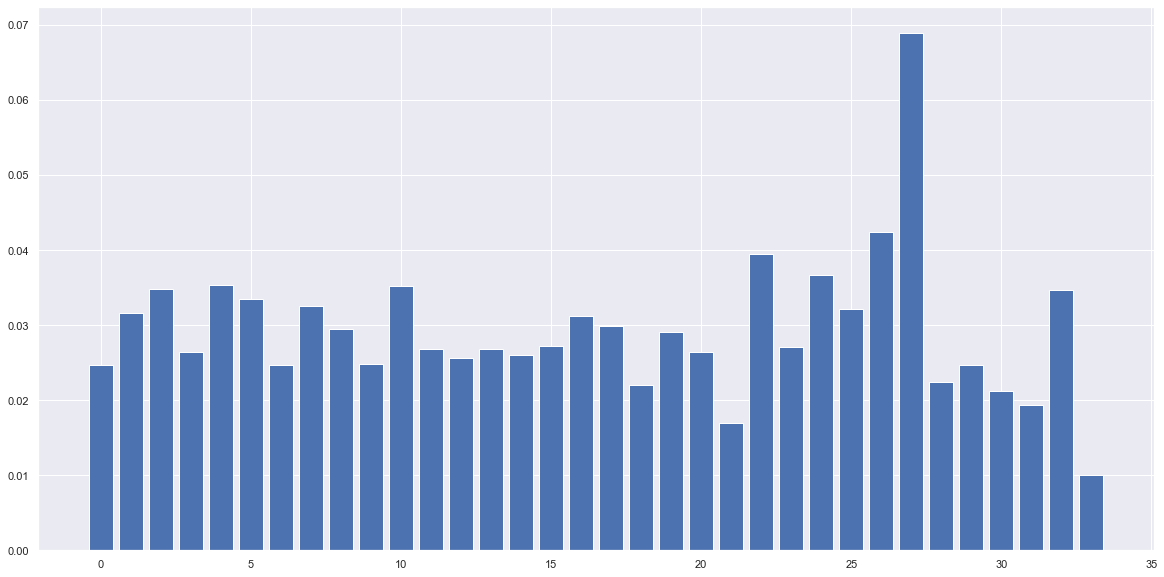

In [12]:
from xgboost import XGBClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

# fit model no training data
model = XGBClassifier()
model.fit(training_features, training_target)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [13]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(100, 'Importance Coef')

,Importance Coef,Features
27,0.068963,kcl_b_ind_mosaicsgrouping_family_union
26,0.042438,kcl_b_ind_mosaicsgrouping_cultural_connections
22,0.039440,was_duplicated
24,0.036618,kcl_b_ind_mosaicsgrouping_autumn_years
4,0.035279,length_of_residence
10,0.035199,ers_member_cost_year_1
2,0.034787,fsv_id_theft_flag
32,0.034679,kcl_b_ind_mosaicsgrouping_thriving_boomers
5,0.033443,do_not_direct_mail_solicit
7,0.032557,ers_ent_count_year_1


# 3. Feature Selection Removing any Zero Impact Values

In [14]:
clean_memberanalysis = clean_memberanalysis[['fsv_credit_card_flag',
'household_key',
'fsv_cmsi_flag',
'fsv_id_theft_flag',
'number_of_children',
'length_of_residence',
'do_not_direct_mail_solicit',
'email_available',
'ers_ent_count_year_1',
'ers_ent_count_year_2',
'ers_ent_count_year_3',
'ers_member_cost_year_1',
'ers_member_cost_year_2',
'ers_member_cost_year_3',
'member_tenure_years',
'basic_cost',
'calculated_tow_miles',
'is_nsr',
'plus_cost',
'total_cost',
'tow_destination_latitude',
'tow_destination_longitude',
'was_duplicated',
'was_towed_to_aar_referral',
'kcl_b_ind_mosaicsgrouping_autumn_years',
'kcl_b_ind_mosaicsgrouping_booming_with_confidence',
'kcl_b_ind_mosaicsgrouping_cultural_connections',
'kcl_b_ind_mosaicsgrouping_family_union',
'kcl_b_ind_mosaicsgrouping_flourishing_families',
'kcl_b_ind_mosaicsgrouping_power_elite',
'kcl_b_ind_mosaicsgrouping_singles_and_starters',
'kcl_b_ind_mosaicsgrouping_surburban_style',
'kcl_b_ind_mosaicsgrouping_thriving_boomers',
'kcl_b_ind_mosaicsgrouping_young_city_solos']]


In [15]:
# clean_memberanalysis = household_grouped.drop(col_to_drop, axis = 1)

In [16]:
clean_memberanalysis.columns

Index(['fsv_credit_card_flag', 'household_key', 'fsv_cmsi_flag',
       'fsv_id_theft_flag', 'number_of_children', 'length_of_residence',
       'do_not_direct_mail_solicit', 'email_available', 'ers_ent_count_year_1',
       'ers_ent_count_year_2', 'ers_ent_count_year_3',
       'ers_member_cost_year_1', 'ers_member_cost_year_2',
       'ers_member_cost_year_3', 'member_tenure_years', 'basic_cost',
       'calculated_tow_miles', 'is_nsr', 'plus_cost', 'total_cost',
       'tow_destination_latitude', 'tow_destination_longitude',
       'was_duplicated', 'was_towed_to_aar_referral',
       'kcl_b_ind_mosaicsgrouping_autumn_years',
       'kcl_b_ind_mosaicsgrouping_booming_with_confidence',
       'kcl_b_ind_mosaicsgrouping_cultural_connections',
       'kcl_b_ind_mosaicsgrouping_family_union',
       'kcl_b_ind_mosaicsgrouping_flourishing_families',
       'kcl_b_ind_mosaicsgrouping_power_elite',
       'kcl_b_ind_mosaicsgrouping_singles_and_starters',
       'kcl_b_ind_mosaicsgrouping_s

In [17]:
clean_memberanalysis.isnull().sum()

fsv_credit_card_flag                                    0
household_key                                           0
fsv_cmsi_flag                                           0
fsv_id_theft_flag                                       0
number_of_children                                   1628
length_of_residence                                  1628
do_not_direct_mail_solicit                              0
email_available                                         0
ers_ent_count_year_1                                  799
ers_ent_count_year_2                                  799
ers_ent_count_year_3                                  799
ers_member_cost_year_1                                799
ers_member_cost_year_2                                799
ers_member_cost_year_3                                799
member_tenure_years                                     0
basic_cost                                           1832
calculated_tow_miles                                 1840
is_nsr        

In [18]:
clean_memberanalysis.shape

(5240, 34)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [20]:
pipe = Pipeline([('scaler',StandardScaler()),('ridge', Ridge())])

# Splitting Data

In [21]:
X = clean_memberanalysis.drop('fsv_credit_card_flag', axis = 1)
y = clean_memberanalysis.fsv_credit_card_flag

In [22]:
# X  = X [[ 'historical_sales_volume',
#        'number_of_prior_year_transactions', 'do_not_direct_mail_solicit',
#        'do_not_telemarket', 'repurchase_method_NOTICE',
#        'last_transaction_channel_MAIL',
#        'last_transaction_channel_WEB',
#        'desk_Y', 'executive_chair_Y', 'standard_chair_Y', 'monitor_Y',
#        'printer_Y', 'computer_Y', 'insurance_Y', 'toner_Y',
#        'office_supplies_Y', 'number_of_employees_large',
#        'number_of_employees_small',
#        'number_of_employees_unknown', 'language_non-english', 'tenure']]

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

In [24]:
print(training_features.shape)
print(training_target.shape)
print(test_features.shape)
print(test_target.shape)

(4192, 33)
(4192,)
(1048, 33)
(1048,)


# 4. Establishing a baseline

In [25]:
np.unique(training_target, return_counts=True)

(array([0, 1], dtype=int64), array([3743,  449], dtype=int64))

In [26]:
clean_memberanalysis['fsv_credit_card_flag'].value_counts(normalize=True)

0    0.889695
1    0.110305
Name: fsv_credit_card_flag, dtype: float64

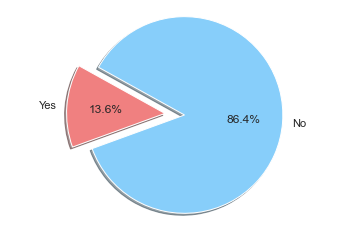

In [27]:
# import matplotlib.pyplot as plt

# # Data to plot
# labels = 0,2014, 2015,2016,2017,2018,2019
# sizes = [863856, 136144]
# colors = ['gold', 'yellowgreen', 'lightcoral','#ff9999','#66b3ff','#99ff99','#ffcc99']
# explode = (0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  # explode 1st slice

# # Plot
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
# autopct='%1.1f%%', shadow=True, startangle=200)

# plt.axis('equal')
# plt.show()

import matplotlib.pyplot as plt

# Data to plot
labels = 'No', 'Yes'
sizes = [863856, 136144]
colors = ['lightskyblue', 'lightcoral']
explode = (0.2, 0.0,)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=200)

plt.axis('equal')
plt.show()

In [28]:
from sklearn.dummy import DummyClassifier
dummy_baseline = DummyClassifier(strategy="most_frequent")
dummy_baseline.fit(test_features, test_target)

test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))


[0 0 0 ... 0 0 0]
The fraction of correct classifications is: 0.877


# 4. Modeling with an imbalanced dataset

In [29]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 0, solver='newton-cg', max_iter=1000)))
models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier()))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('GNB  ', GaussianNB()))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 0)))
models.append(('ABM  ', AdaBoostClassifier()))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=87, random_state=123)))
models.append(('ExT  ', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : nan (nan)
LDA    : nan (nan)
KNN    : nan (nan)
CART   : nan (nan)
GNB    : nan (nan)
KSVM   : nan (nan)
ABM    : nan (nan)
GBM    : nan (nan)
RFM    : nan (nan)
ExT    : nan (nan)


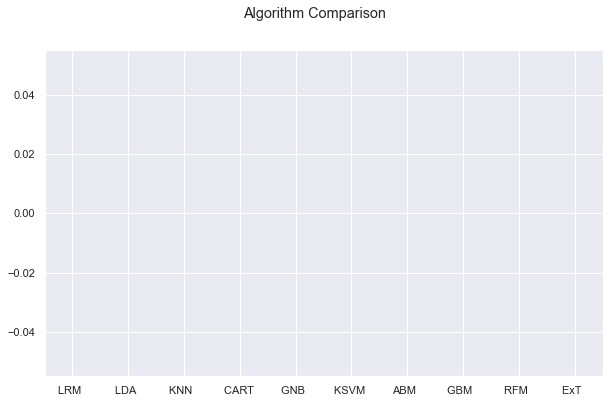

In [30]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 5. Modeling with Undersampled Data

In [31]:
# Class count
#df_train = autinsurance
count_class_0, count_class_1 = clean_memberanalysis.fsv_credit_card_flag.value_counts()

# Divide by class
df_class_0 = clean_memberanalysis[clean_memberanalysis['fsv_credit_card_flag'] == 0]
df_class_1 = clean_memberanalysis[clean_memberanalysis['fsv_credit_card_flag'] == 1]

In [32]:
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.shape

(578, 34)

Random under-sampling:
0    578
1    578
Name: fsv_credit_card_flag, dtype: int64


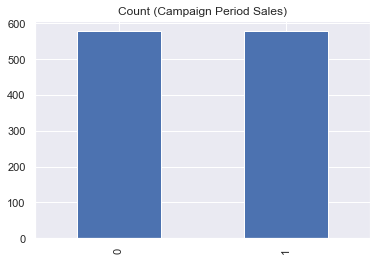

In [33]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.fsv_credit_card_flag.value_counts())

df_test_under.fsv_credit_card_flag.value_counts().plot(kind='bar', title='Count (Campaign Period Sales)');

In [34]:
X = df_test_under.drop('fsv_credit_card_flag', axis = 1)
y = df_test_under.fsv_credit_card_flag

In [35]:
# X  = X [[ 'historical_sales_volume',
#        'number_of_prior_year_transactions', 'do_not_direct_mail_solicit',
#        'do_not_telemarket', 'repurchase_method_NOTICE',
#        'last_transaction_channel_MAIL',
#        'last_transaction_channel_WEB',
#        'desk_Y', 'executive_chair_Y', 'standard_chair_Y', 'monitor_Y',
#        'printer_Y', 'computer_Y', 'insurance_Y', 'toner_Y',
#        'office_supplies_Y', 'number_of_employees_large',
#        'number_of_employees_small',
#        'number_of_employees_unknown', 'language_non-english', 'tenure']]

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

In [37]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 0, solver='newton-cg', max_iter=1000)))
models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier()))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('GNB  ', GaussianNB()))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 0)))
models.append(('ABM  ', AdaBoostClassifier()))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=87, random_state=42)))
models.append(('ExT  ', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : nan (nan)
LDA    : nan (nan)
KNN    : nan (nan)
CART   : nan (nan)
GNB    : nan (nan)
KSVM   : nan (nan)
ABM    : nan (nan)
GBM    : nan (nan)
RFM    : nan (nan)
ExT    : nan (nan)


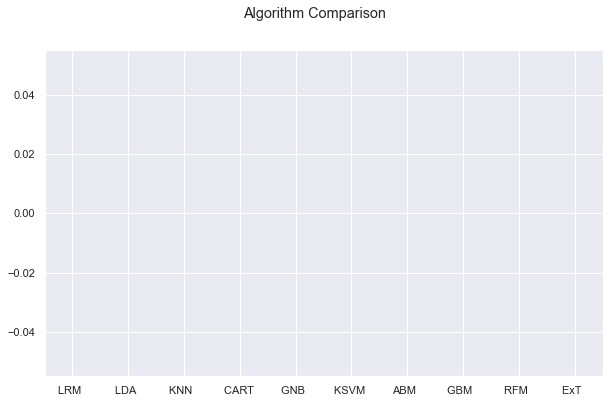

In [38]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6. Modeling with Oversampled Dataset

In [39]:
# Class count
#df_train = autinsurance
count_class_0, count_class_1 = clean_memberanalysis.fsv_credit_card_flag.value_counts()

# Divide by class
df_class_0 = clean_memberanalysis[clean_memberanalysis['fsv_credit_card_flag'] == 0]
df_class_1 = clean_memberanalysis[clean_memberanalysis['fsv_credit_card_flag'] == 1]

In [40]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(4662, 34)

Random over-sampling:
0    4662
1    4662
Name: fsv_credit_card_flag, dtype: int64


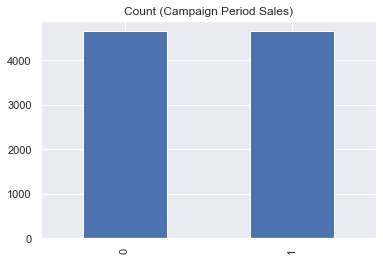

In [41]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.fsv_credit_card_flag.value_counts())

df_test_over.fsv_credit_card_flag.value_counts().plot(kind='bar', title='Count (Campaign Period Sales)');

In [42]:
X = df_test_over.drop('fsv_credit_card_flag', axis = 1)
y = df_test_over.fsv_credit_card_flag

In [43]:
# X  = X [[ 'historical_sales_volume',
#        'number_of_prior_year_transactions', 'do_not_direct_mail_solicit',
#        'do_not_telemarket', 'repurchase_method_NOTICE',
#        'last_transaction_channel_MAIL',
#        'last_transaction_channel_WEB',
#        'desk_Y', 'executive_chair_Y', 'standard_chair_Y', 'monitor_Y',
#        'printer_Y', 'computer_Y', 'insurance_Y', 'toner_Y',
#        'office_supplies_Y', 'number_of_employees_large',
#        'number_of_employees_small',
#        'number_of_employees_unknown', 'language_non-english', 'tenure']]

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

In [45]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 0, solver='newton-cg', max_iter=1000)))
models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier()))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('GNB  ', GaussianNB()))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 0)))
models.append(('ABM  ', AdaBoostClassifier()))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators= 66, random_state=42, class_weight='balanced')))
models.append(('ExT  ', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : nan (nan)
LDA    : nan (nan)
KNN    : nan (nan)
CART   : nan (nan)
GNB    : nan (nan)
KSVM   : nan (nan)
ABM    : nan (nan)
GBM    : nan (nan)
RFM    : nan (nan)
ExT    : nan (nan)


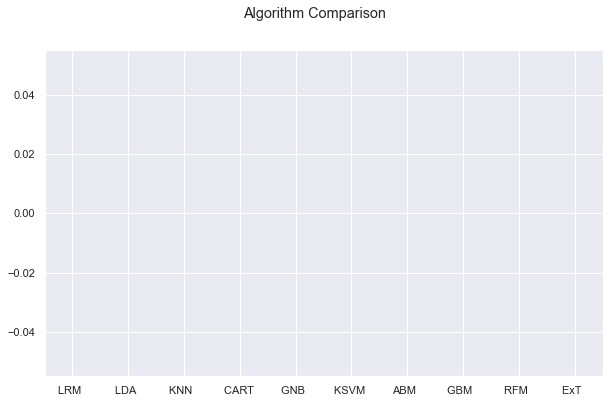

In [46]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 7. Model assessment

In [47]:
# For calculating AUROC
from sklearn.metrics import roc_curve, auc

In [48]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
SimpleImputer()
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [49]:
import scipy.sparse as sp
X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])
imp = SimpleImputer(missing_values=-1, strategy='mean')
imp.fit(X)
SimpleImputer(missing_values=-1)
X_test = sp.csc_matrix([[-1, 2], [6, -1], [7, 6]])
print(imp.transform(X_test).toarray())

[[3. 2.]
 [6. 3.]
 [7. 6.]]


In [50]:
import pandas as pd
df = pd.DataFrame([["a", "x"],
                    [np.nan, "y"],
                    ["a", np.nan],
                    ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


In [51]:
import xgboost as xgb
import pandas as pd
import numpy as np
X = np.arange(100).reshape(10, 10)
X = X.astype(np.float32)
X[0, :] = np.NaN
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
2,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
3,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
4,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
5,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0
6,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0
7,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0
8,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0
9,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

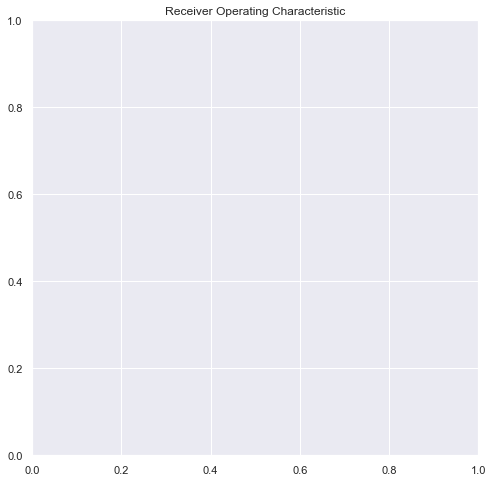

In [52]:
# Initialize plot
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')


# ---- DT---- #

# Predicts X_test using model
DTModel = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTModel.fit(training_features, training_target)
DT_pred = DTModel.predict_proba(test_features)
DT_pred = [p[1] for p in DT_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, DT_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Decision Tree', auroc))


# ---- LDA---- #

# Predicts X_test using model
LDAModel = LinearDiscriminantAnalysis()
LDAModel.fit(training_features, training_target)
LDA_pred = LDAModel.predict_proba(test_features)
LDA_pred = [p[1] for p in LDA_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, LDA_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('LDA', auroc))


# ---- GB ---- #

# Predicts X_test using model
GBModel = GradientBoostingClassifier()
GBModel.fit(training_features, training_target)
GB_pred = GBModel.predict_proba(test_features)
GB_pred = [p[1] for p in GB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, GB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Gradient Boosting', auroc))


# # ---- KNN---- #

# Predicts test_features using model
KNNModel = KNeighborsClassifier()
KNNModel.fit(training_features, training_target)
KNN_pred = KNNModel.predict_proba(test_features)
KNN_pred = [p[1] for p in KNN_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, KNN_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('KNN', auroc))


# ---- NB---- #
# Predicts test_features using model
NBModel = GaussianNB()
NBModel.fit(training_features, training_target)
NB_pred = NBModel.predict_proba(test_features)
NB_pred = [p[1] for p in NB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, NB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('NB', auroc))



# ---- LR ---- #
# Predicts test_features using model
LRModel = LogisticRegression(random_state = 0, solver='newton-cg', max_iter=1000)
LRModel.fit(training_features, training_target)
LR_pred = LRModel.predict_proba(test_features)
LR_pred = [p[1] for p in LR_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, LR_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('LR', auroc))


# ---- KNN ---- #
# Predicts test_features using model
KNNModel = KNeighborsClassifier(n_neighbors = 57)
KNNModel.fit(training_features, training_target)
KNN_pred = KNNModel.predict_proba(test_features)
KNN_pred = [p[1] for p in KNN_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, KNN_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('KNN', auroc))


# ---- RF ---- #
# Predicts test_features using model
RFModel = RandomForestClassifier(n_estimators=87, random_state=42)
RFModel.fit(training_features, training_target)
RF_pred = RFModel.predict_proba(test_features)
RF_pred = [p[1] for p in RF_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, RF_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('RF', auroc))


# # ---- Bagging ---- #
# # Predicts test_features using model
# Bagg_pred = BModel.predict_proba(test_features)
# Bagg_pred = [p[1] for p in Bagg_pred]
    
# # Calculates ROC curve
# fpr, tpr, thresholds = roc_curve(test_target, Bagg_pred)
    
# # Calculates AUROC
# auroc = round(auc(fpr, tpr), 3)
    
# # Plots ROC curve and labels with AUROC
# plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Bagging', auroc))


# ---- Ada-Boost ---- #
# Predicts test_features using model
ADBModel = AdaBoostClassifier()
ADBModel.fit(training_features, training_target)
ADB_pred = ADBModel.predict_proba(test_features)
ADB_pred = [p[1] for p in ADB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, ADB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Ada-Boost', auroc))


# ---- Gradient-Boosting ---- #
# Predicts test_features using model
GB_pred = GBModel.predict_proba(test_features)
GB_pred = [p[1] for p in GB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, GB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Gradient Boosting', auroc))


# ---- Extra Tree ---- #
# Predicts test_features using model
ExTrModel = ExtraTreesClassifier()
ExTrModel.fit(training_features, training_target)
ExTr_pred = ExTrModel.predict_proba(test_features)
ExTr_pred = [p[1] for p in ExTr_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, ExTr_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Extra Tree', auroc))


# ---- Legend and labels ---- #

# Plot legend
plt.legend(loc='lower right')

# Plots 45 degree dotted black line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 8. Random Forest Classification

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [54]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [55]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)


# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }


In [56]:
rfc = RandomForestClassifier(n_estimators =800, max_depth= 260, max_features='sqrt')
rfc.fit(training_features, training_target)
rfc_predict = rfc.predict(test_features)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(test_target, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_target, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# 8.2 Validation Curve

In [57]:
# ! pip install psutil

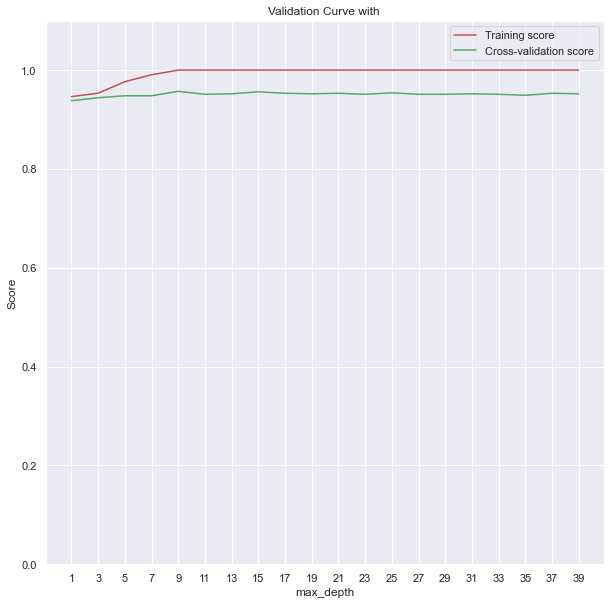

In [58]:
from sklearn.model_selection import validation_curve
import psutil


param_range = np.arange(1, 41, 2)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(n_estimators =800, max_depth= 260, max_features='sqrt'), 
    X, y, param_name="max_depth", cv=10, 
    param_range=param_range,n_jobs=psutil.cpu_count(),
    scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10,10))
plt.title("Validation Curve with ")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
#plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, train_scores_mean, label="Training score",
             color="r")
#plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")

plt.legend(loc="best")
plt.xticks(param_range)
plt.savefig('DSSE.jpg')
plt.show()

In [59]:
df_test_under.shape

(1156, 34)

## 8.3 Cumulative Curve

In [60]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [61]:
import matplotlib.pyplot as plt

import scikitplot as skplt

RF = RandomForestClassifier(n_estimators =800, max_depth= 260, max_features='sqrt')

RF.fit(training_features, training_target)

predicted_probas = RF.predict_proba(test_features)


skplt.metrics.plot_cumulative_gain(test_target, predicted_probas)

plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# 8.4 Learning Curve

In [62]:
# ! pip install scikit-plot

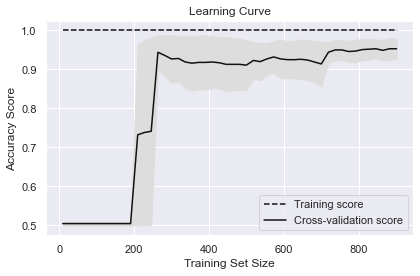

In [63]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators =800, max_depth= 260, max_features='sqrt'), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


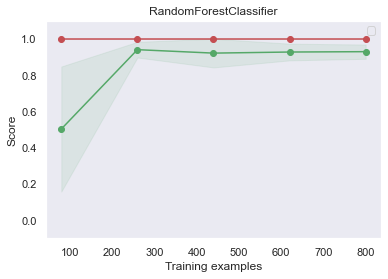

In [64]:
from sklearn.model_selection import KFold

cv = KFold()

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators =200, max_depth= None,
                                                        max_features='sqrt'),
                                                        X, y, n_jobs=-1, cv=cv, 
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("RandomForestClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()

# box-like grid
plt.grid()

# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show()

## 8.4 Probablity Table

In [65]:
# X = df_test_over.drop('fsv_credit_card_flag', axis = 1)
# y = df_test_over.fsv_credit_card_flag

# # X  = X [[ 'historical_sales_volume',
# #        'number_of_prior_year_transactions', 'do_not_direct_mail_solicit',
# #        'do_not_telemarket', 'repurchase_method_NOTICE',
# #        'last_transaction_channel_MAIL',
# #        'last_transaction_channel_WEB',
# #        'desk_Y', 'executive_chair_Y', 'standard_chair_Y', 'monitor_Y',
# #        'printer_Y', 'computer_Y', 'insurance_Y', 'toner_Y',
# #        'office_supplies_Y', 'number_of_employees_large',
# #        'number_of_employees_small',
# #        'number_of_employees_unknown', 'language_non-english', 'tenure']]

# # Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split

# training_features, test_features, \
# training_target, test_target, = train_test_split(X,y,
#                                                test_size = .2,
#                                                random_state=12)

In [66]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np

X, y1 = make_classification(n_samples=5, n_features=5, n_informative=2, n_classes=2, random_state=1)
y2 = shuffle(y1, random_state=1)
Y = np.vstack((y1, y2)).T

forest = RandomForestClassifier(n_estimators=10, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X, Y).predict(X)

print(multi_target_forest.predict_proba(X))

[array([[0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.4, 0.6]]), array([[0.6, 0.4],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.9, 0.1],
       [0.9, 0.1]])]


In [67]:
# Predicts test_features using model
RFModel = RandomForestClassifier(n_estimators =800, max_depth= 260, max_features='sqrt',random_state=42)
RFModel.fit(training_features, training_target)
RF_pred = RFModel.predict(test_features)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [68]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
scoring=ftwo_scorer, cv=5)

In [69]:
def prob_table(X_test, y_test, classifier):
    '''
    This function takes in a test set X_test, y_test,
    and a classifier (that has been fit to data)
    It returns a DataFrame with columns below:
    | probab_0 | probab_1 | predicted_value | actual_value |
    ========================================================
    '''
    ypred = classifier.predict(X_test)
    proba = classifier.predict_proba(X_test)   # columns 0 and 1
    df = pd.DataFrame()
    df['Actual_value'] = y_test
    for k in range(proba.shape[1]):
        df['Probab_{}'.format(k)] = proba[:, k]

    df['Predicted_value'] = ypred
    
    
    return df

In [70]:
# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [71]:
from sklearn.svm import LinearSVC
from sklearn.exceptions import NotFittedError
try:
     LinearSVC().predict([[1, 2], [2, 3], [3, 4]])
except NotFittedError as e:
    print(repr(e))

NotFittedError("This LinearSVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.")


In [72]:
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
clf = sklearn.neighbors.KNeighborsClassifier()
clf.fit(X, Y)

KNeighborsClassifier()

In [73]:
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()

In [74]:
from sklearn.datasets import load_iris
iris=load_iris()

In [75]:
iris.feature_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1)

In [77]:
print(Xtrain.shape)
print(Xtest.shape)

(135, 4)
(15, 4)


In [78]:
m.fit(Xtrain,ytrain)
print(m.score(Xtest,ytest))

0.9333333333333333


In [79]:
m.predict_proba(test_features)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [80]:
m.score(test_features, test_target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [81]:
import scikitplot as skplt

In [82]:
metrics.accuracy_score(test_target,RF_pred)

NameError: name 'RF_pred' is not defined

In [83]:
RFModelProbTab = prob_table(test_features, test_target, RFModel)
RFModelProbTab = RFModelProbTab[['Probab_0', 'Probab_1',]]
RFModelProbTab.head()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [84]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())

classifier = clf.fit(X,y)
predictions = classifier.predict_proba(Xtest)
print(predictions)

nan


ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

In [85]:
predict_proba = pd.DataFrame(m.predict_proba(test_features))
predict_proba.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [86]:
pred_log = pd.DataFrame(m_pred)
pred_log.head()

NameError: name 'm_pred' is not defined

In [87]:
Y1_test1 = test_target.reset_index()
Y1_test1.head()

,index,fsv_credit_card_flag
0,2338,0
1,3940,0
2,1316,1
3,2945,1
4,2351,0


In [88]:
m.pred = pd.DataFrame(m.pred)

AttributeError: 'LogisticRegression' object has no attribute 'pred'

In [89]:
Y1_test1 = test_target.reset_index()
Y1_test1.head()

,index,fsv_credit_card_flag
0,2338,0
1,3940,0
2,1316,1
3,2945,1
4,2351,0


In [90]:
print(type(Y1_test1))
print(type(rfPred))
print(type(predict_proba))

<class 'pandas.core.frame.DataFrame'>


NameError: name 'rfPred' is not defined

In [91]:
predictions = pd.concat([Y1_test1,RF_pred,predict_proba],axis = 1)
predictions.head()

NameError: name 'RF_pred' is not defined

In [92]:
predictions.columns = ['Index', 'Actual_value',  'Predicted_value' ,'Sales_0', 'Sales_1']
predictions.head()

NameError: name 'predictions' is not defined

In [93]:
# AUC
from sklearn import metrics
auc_score = metrics.roc_auc_score( predictions.Actual_value, predictions.Sales_1 )
round( float( auc_score ), 2 )

NameError: name 'predictions' is not defined

In [94]:
RFpredict_probas = RFModel.predict_proba(test_features)
RFpredictions = RFModel.predict(test_features)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [95]:
skplt.metrics.plot_confusion_matrix(test_target,RFpredictions)

NameError: name 'RFpredictions' is not defined

In [96]:
new_preds = np.where(RFpredict_probas[:, 1]< 0.2, 0, 1)

NameError: name 'RFpredict_probas' is not defined

In [97]:
skplt.metrics.plot_confusion_matrix(test_target,new_preds)

NameError: name 'new_preds' is not defined

In [98]:
# Perfermance over sample of the data - Cumulative
skplt.metrics.plot_cumulative_gain(test_target,RFpredict_probas)

# This graph shows model gains over percentage sample Ex: if we contact 0.4 of the sample, we gain .8 will make purchase
# .8 will not make make the purchase 

NameError: name 'RFpredict_probas' is not defined

In [99]:
# Perfermance over sample of the data - At given point. This chart shows the left over the sample

skplt.metrics.plot_lift_curve(test_target,RFpredict_probas)
plt.legend(loc = 'upper right')

NameError: name 'RFpredict_probas' is not defined

In [100]:
# ROC Curves chart shows the over all perfermance of the model
skplt.metrics.plot_roc(test_target,RFpredict_probas)

NameError: name 'RFpredict_probas' is not defined

In [101]:
skplt.metrics.plot_precision_recall(test_target,RFpredict_probas)

NameError: name 'RFpredict_probas' is not defined

In [102]:
fpr, tpr, threshold = metrics.roc_curve(test_target,predictions.Sales_1,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='ROC curve (area = %0.2f)' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

NameError: name 'predictions' is not defined

In [103]:
cutoff_prob = threshold[(np.abs(tpr - 0.62)).argmin()]
round( float( cutoff_prob ), 2 )

NameError: name 'threshold' is not defined

In [104]:
predictions['new_labels'] = predictions['Sales_1'].map( lambda x: 1 if x >= 0.62 else 0 )
predictions.head()

NameError: name 'predictions' is not defined

In [105]:
import seaborn as sns
cm1 = metrics.confusion_matrix( predictions.Actual_value,
                          predictions.new_labels, [1,0] )
sns.heatmap(cm1, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

NameError: name 'predictions' is not defined

In [106]:
metrics.accuracy_score(predictions.Actual_value,predictions.new_labels, [1,0] )

NameError: name 'predictions' is not defined

# KS, Gains, and Lift Chart

In [107]:
conditions = [
    (predictions['Predicted_value']== 0), 
    predictions['Predicted_value']== 1]

choices = [predictions['Sales_0'], predictions['Sales_1']]

predictions['Sales_Prob'] = np.select(conditions, choices)

NameError: name 'predictions' is not defined

In [108]:
predictions = predictions[[ 'Actual_value', 'Sales_Prob']]
predictions.head()

NameError: name 'predictions' is not defined

In [109]:
predictions['decile'] = pd.qcut(predictions['Sales_Prob'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
predictions.head()

NameError: name 'predictions' is not defined

In [110]:
predictions.columns = ['Defaulter','Probability','Decile']
predictions.head()

NameError: name 'predictions' is not defined

In [111]:
predictions['Non-Defaulter'] = 1-predictions['Defaulter']
predictions.head()


NameError: name 'predictions' is not defined

In [112]:
df1 = pd.pivot_table(data=predictions,index=['Decile'],values=['Defaulter','Non-Defaulter','Probability'],
                     aggfunc={'Defaulter':[np.sum],
                              'Non-Defaulter':[np.sum],
                              'Probability' : [np.min,np.max]})
df1.head()

NameError: name 'predictions' is not defined

In [113]:
df1.reset_index()

NameError: name 'df1' is not defined

In [114]:
df1.columns = ['Defaulter_Count','Non-Defaulter_Count','max_score','min_score']
df1['Total_Cust'] = df1['Defaulter_Count']+df1['Non-Defaulter_Count']
df1

NameError: name 'df1' is not defined

In [115]:
df2 = df1.sort_values(by='min_score',ascending=False)
df2

NameError: name 'df1' is not defined

In [116]:
df2['Default_Rate'] = (df2['Defaulter_Count'] / df2['Total_Cust']).apply('{0:.2%}'.format)
default_sum = df2['Defaulter_Count'].sum()
non_default_sum = df2['Non-Defaulter_Count'].sum()
df2['Default %'] = (df2['Defaulter_Count']/default_sum).apply('{0:.2%}'.format)
df2['Non_Default %'] = (df2['Non-Defaulter_Count']/non_default_sum).apply('{0:.2%}'.format)
df2

NameError: name 'df2' is not defined

In [117]:
df2['ks_stats'] = np.round(((df2['Defaulter_Count'] / df2['Defaulter_Count'].sum()).cumsum() -(df2['Non-Defaulter_Count'] / df2['Non-Defaulter_Count'].sum()).cumsum()), 4) * 100
df2

NameError: name 'df2' is not defined

In [118]:
flag = lambda x: '*****' if x == df2['ks_stats'].max() else ''
df2['max_ks'] = df2['ks_stats'].apply(flag)
df2

NameError: name 'df2' is not defined

# Gains Chart

In [119]:
# df_test1 = df_test.copy()
# df_test1['default_cum%'] = np.round(((df_test['Defaulter_Count'] / df_test['Defaulter_Count'].sum()).cumsum()), 4) * 100
# df_test1

In [120]:
df_test_over.head()

,fsv_credit_card_flag,household_key,fsv_cmsi_flag,fsv_id_theft_flag,number_of_children,length_of_residence,do_not_direct_mail_solicit,email_available,ers_ent_count_year_1,ers_ent_count_year_2,ers_ent_count_year_3,ers_member_cost_year_1,ers_member_cost_year_2,ers_member_cost_year_3,member_tenure_years,basic_cost,calculated_tow_miles,is_nsr,plus_cost,total_cost,tow_destination_latitude,tow_destination_longitude,was_duplicated,was_towed_to_aar_referral,kcl_b_ind_mosaicsgrouping_autumn_years,kcl_b_ind_mosaicsgrouping_booming_with_confidence,kcl_b_ind_mosaicsgrouping_cultural_connections,kcl_b_ind_mosaicsgrouping_family_union,kcl_b_ind_mosaicsgrouping_flourishing_families,kcl_b_ind_mosaicsgrouping_power_elite,kcl_b_ind_mosaicsgrouping_singles_and_starters,kcl_b_ind_mosaicsgrouping_surburban_style,kcl_b_ind_mosaicsgrouping_thriving_boomers,kcl_b_ind_mosaicsgrouping_young_city_solos
1,0,969.0,0,0,0.000000,14.000000,0.0,0.833333,0.000000,0.666667,1.5,0.000000,58.808333,150.595,35.333333,43.775000,2.25,0.0,12.75,56.525000,31.46635,-53.382865,0.25,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,3338.0,0,0,1.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,37.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8718.0,0,0,0.000000,15.000000,0.0,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,11524.0,0,0,1.142857,12.142857,0.0,0.857143,0.333333,2.166667,1.0,19.616667,122.058333,53.000,36.285714,58.850000,1.20,0.0,0.00,58.850000,20.88045,-35.721380,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,13422.0,0,0,0.000000,15.000000,0.0,0.500000,0.250000,0.000000,0.0,14.712500,0.000000,0.000,33.000000,39.616667,0.00,0.0,0.00,39.616667,0.00000,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [121]:
df_test_over['predicted_prob_sale'] = m.predict_proba(X)[:,1]
df_test_over.head()

ValueError: Length of values (150) does not match length of index (9324)

In [122]:
df_test_over.to_csv('df_test_over_prob.csv')